In [81]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import PIL
import PIL.Image
import random
from mpl_toolkits.axes_grid1 import ImageGrid
from skimage.transform import resize
import copy
from tqdm import tqdm

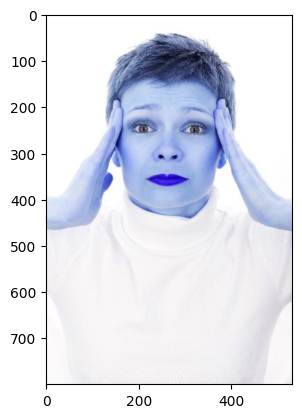

In [60]:
img_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/images/ache-adult-depression-expression-41253.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

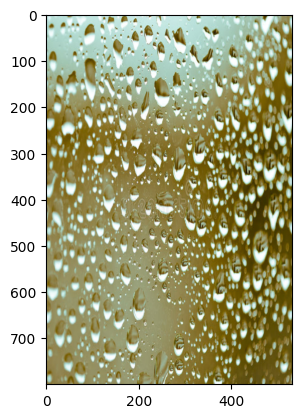

In [61]:
mask1_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/mask1.jpg'
mask1 = cv2.imread(mask1_path)
# mask1 = tf.image.resize(mask1, img.shape[0:2])
mask1 = cv2.resize(mask1, (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA)
plt.imshow(mask1)
plt.show()

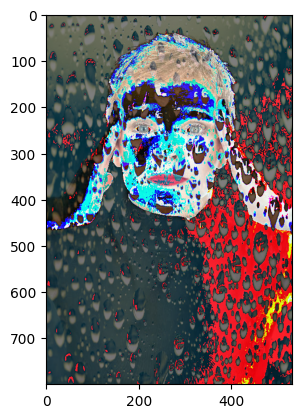

In [81]:
a = 0.5##0.005,0.01 0.05,0.1,0.5
occluded_image = (a*mask1).astype('uint8')+img
plt.imshow(cv2.cvtColor(occluded_image, cv2.COLOR_BGR2RGB))
plt.show()

In [82]:
cv2.imwrite('/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/occluded_dataset/occluded_image.jpg',occluded_image)

True

# Generating occluded datasets with different a values

In [243]:
A = [0.005,0.01,0.05,0.1,0.5,1]
Path_to_occluded_folders = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/occluded_dataset/'

In [254]:
##directory to the original images
data_path  ='/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/'
Images_dir = os.path.join(data_path, 'images')
Masks_dir = os.path.join(data_path, 'masks')

#creating a list of the images in the folder
Images_list = sorted(os.listdir(Images_dir))
Masks_list = sorted(os.listdir(Masks_dir))

#reading the mask
mask1_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/mask1.jpg'
mask1 = cv2.imread(mask1_path)

for a in A:
    folder_name = 'a='+f"{a}"
    Path_to_a = os.path.join(Path_to_occluded_folders,folder_name)
    Path_to_new_mask = os.path.join(Path_to_occluded_folders,'croped_resized_masks')
    if not(os.path.exists(Path_to_a)):
        os.mkdir(Path_to_a)
    if not(os.path.exists(Path_to_new_mask)):
        os.mkdir(Path_to_new_mask)
    print('-------------------------------------------')
    print(f"Applying distribution shift .....")
    print(f"The new dataset is being stored in {folder_name}")
    for (mask_name,img_name) in zip(Masks_list, Images_list):
        ##reading the image
        img_dir = os.path.join(Images_dir, img_name)
        img = cv2.imread(img_dir)
        mask_dir = os.path.join(Masks_dir, mask_name)
        mask = cv2.imread(mask_dir)
        ## resizing the mask to match the image
        mask1_resized = cv2.resize(mask1, (img.shape[1],img.shape[0]), interpolation = cv2.INTER_AREA)
        
        ##adding the mask to the image for a value
        occluded_image = (a*mask1_resized).astype('uint8')+img
        occluded_image = ((occluded_image/np.amax(occluded_image))*255).astype('uint8')
        mask = (mask/np.amax(mask))
        ###save the occluded image to its specific folder
        cv2.imwrite(os.path.join(Path_to_a,img_name),occluded_image)
        cv2.imwrite(os.path.join(Path_to_new_mask,mask_name),mask)
        

-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=0.005
-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=0.01
-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=0.05
-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=0.1
-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=0.5
-------------------------------------------
Applying distribution shift .....
The new dataset is being stored in a=1


# Generating the dataset of shuffled images 

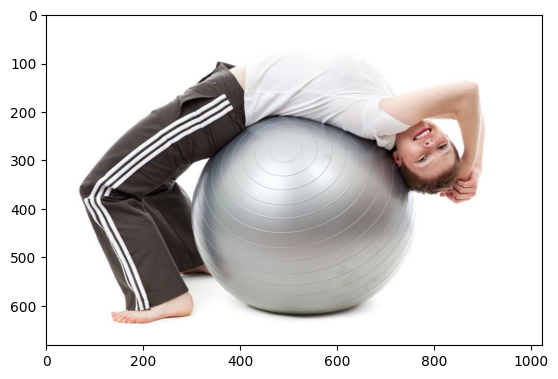

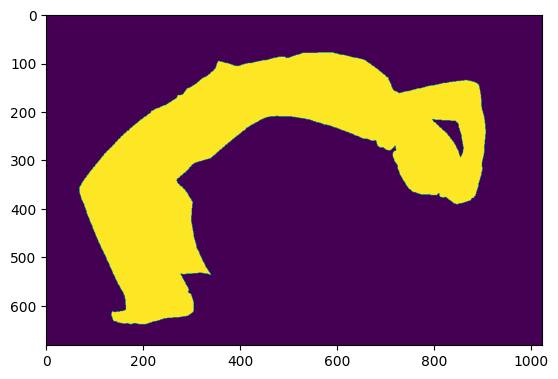

In [237]:
###testing on one image 
img_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/images/active-activity-ball-exercise-41213.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
mask_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/masks/active-activity-ball-exercise-41213.png'
mask = cv2.imread(mask_path,0)
plt.imshow(mask)
plt.show()


In [220]:
grid_size = 2


In [235]:
def crop_image(img):
    height = img.shape[0]
    width = img.shape[1]
    
    minimum = min(height, width)
    maximum = max(height, width)
    
    if height == minimum:
        cropped_img = img[:, int(width/4):int(width/4)+height]
    else:
        cropped_img = img[int(height/4):int(height/4)+width]
    
    return cropped_img
    

def shuffle_image_mask(img, mask, grid_size):
    Img_height = img.shape[0]
    Img_width = img.shape[1]

    Patch_height = int(Img_height/grid_size)
    Patch_width = int(Img_width/grid_size)
    
    Img_mask_devided = []
    
    for patch_num in range(grid_size**2):
        x_coord = patch_num%grid_size
        y_coord = int(patch_num/grid_size)
        img_patch = img[Patch_height*y_coord:Patch_height*(y_coord+1),Patch_width*x_coord:Patch_width*(x_coord+1)]
        mask_patch = mask[Patch_height*y_coord:Patch_height*(y_coord+1),Patch_width*x_coord:Patch_width*(x_coord+1)]
        Img_mask_devided.append([img_patch, mask_patch])
    
    random.shuffle(Img_mask_devided)
    Img_devided = [i[0] for i in Img_mask_devided]
    Mask_devided = [i[1] for i in Img_mask_devided]
    
    shuffled_img = np.zeros(img.shape)
    shuffled_mask = np.zeros(mask.shape)
    
    for patch_num in range(grid_size**2):
        x_coord = patch_num%grid_size
        y_coord = int(patch_num/grid_size)
        shuffled_img[Patch_height*y_coord:Patch_height*(y_coord+1),Patch_width*x_coord:Patch_width*(x_coord+1)] = Img_devided[patch_num]
        shuffled_mask[Patch_height*y_coord:Patch_height*(y_coord+1),Patch_width*x_coord:Patch_width*(x_coord+1)] = Mask_devided[patch_num]
    
    shuffled_img = ((shuffled_img/np.amax(shuffled_img))*255).astype('uint8')
    shuffled_mask = shuffled_mask/np.amax(shuffled_mask)
    return shuffled_img, shuffled_mask, Img_devided, Mask_devided
    

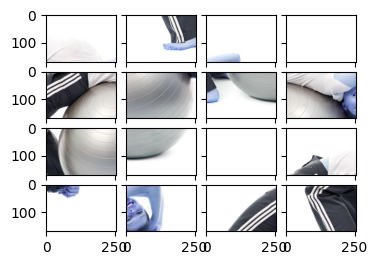

In [207]:
grid_size = 4
img_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/images/active-activity-ball-exercise-41213.jpg'
img = cv2.imread(img_path)
img = crop_image(img)
mask_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/masks/active-activity-ball-exercise-41213.png'
mask = cv2.imread(mask_path,0)
mask = crop_image(mask)


shuffled_img, shuffled_mask, Img_devided, Mask_devided = shuffle_image_mask(img, mask, grid_size)
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(grid_size,grid_size),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, Img_devided):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

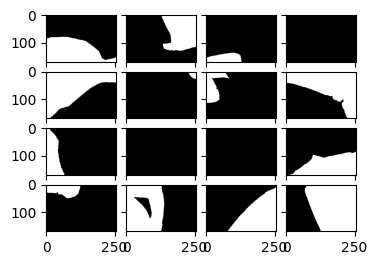

In [208]:
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(grid_size,grid_size),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, Mask_devided):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='gray')
plt.show()

# Generating the shuffled dataset 

In [212]:
List_of_grid_sizes = [2**i for i in range(1,6)]
List_of_grid_sizes

[2, 4, 8, 16, 32]

In [213]:
### defining the paths
## path to the original images and original masks
data_path  ='/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/'
Images_dir = os.path.join(data_path, 'images')
Masks_dir = os.path.join(data_path, 'masks')
print(Images_dir)
print(Masks_dir)
## path to store the shuffled images and shuffled masks
shuffled_data_path  ='/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person shuffled/'
init_folder_name = 'grid='

/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/images
/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/masks


In [232]:
#creating a list of the images in the folder
Images_list = sorted(os.listdir(Images_dir))
Masks_list = sorted(os.listdir(Masks_dir))

i = 0

for grid_size in List_of_grid_sizes:
    Images_folder_name = 'Images_grid='+f"{grid_size}"
    Masks_folder_name = 'Masks_grid='+f"{grid_size}"
    Path_to_image = os.path.join(shuffled_data_path,Images_folder_name)
    Path_to_mask = os.path.join(shuffled_data_path,Masks_folder_name)
    if not(os.path.exists(Path_to_image)):
        os.mkdir(Path_to_image)
    if not(os.path.exists(Path_to_mask)):
        os.mkdir(Path_to_mask)
    print('-------------------------------------------')
    print(f"Applying shuffeling .....")
    print(f"The new dataset is being stored in {Images_folder_name}")
    print(f"The new labels are being stored in {Masks_folder_name}")
    for (img_name, mask_name) in zip(Images_list,Masks_list):
        ##reading the image and the mask
        img_dir = os.path.join(Images_dir, img_name)
        img = cv2.imread(img_dir)
        mask_dir = os.path.join(Masks_dir, mask_name)
        mask = cv2.imread(mask_dir)
        ## shuffling the image and the mask
        shuffled_img, shuffled_mask, Img_devided, Mask_devided = shuffle_image_mask(img, mask, grid_size)
        
        ###save the shuffeled image and mask to their specific folder
        cv2.imwrite(os.path.join(Path_to_image,img_name),shuffled_img)
        cv2.imwrite(os.path.join(Path_to_mask,mask_name),shuffled_mask)
            

-------------------------------------------
Applying shuffeling .....
The new dataset is being stored in Images_grid=2
The new labels are being stored in Masks_grid=2
-------------------------------------------
Applying shuffeling .....
The new dataset is being stored in Images_grid=4
The new labels are being stored in Masks_grid=4
-------------------------------------------
Applying shuffeling .....
The new dataset is being stored in Images_grid=8
The new labels are being stored in Masks_grid=8
-------------------------------------------
Applying shuffeling .....
The new dataset is being stored in Images_grid=16
The new labels are being stored in Masks_grid=16
-------------------------------------------
Applying shuffeling .....
The new dataset is being stored in Images_grid=32
The new labels are being stored in Masks_grid=32


In [ ]:
##check the data and the labels
imgdir = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/occluded_dataset/a=0.005/'
maskdir = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_occluded/occluded_dataset/croped_resized_masks/'
Images_list = sorted(os.listdir(imgdir))
Masks_list = sorted(os.listdir(maskdir))
for (img_name, mask_name) in zip(Images_list,Masks_list):
    ##reading the image and the mask
    img_dir = os.path.join(imgdir, img_name)
    img = cv2.imread(img_dir)
    mask_dir = os.path.join(maskdir, mask_name)
    mask = cv2.imread(mask_dir)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow((mask*255).astype('uint8'), cmap = 'gray')
    plt.show()
        

# Creating stylized images 

In [4]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

2022-11-17 17:51:51.705019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 17:51:52.066590: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 17:51:53.682392: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-17 17:51:53.683145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [75]:

#defining functions
def stylize_image(img_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/images/ache-adult-depression-expression-41253.jpg', stylizer_img_path = '/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_stylized/stylizer.jpg'):
    img = (plt.imread(img_path)).astype(np.float32)[np.newaxis, ...] / 255
    original_shape = copy.copy(img.shape[1:3])
    
    stylizer_img = (plt.imread(stylizer_img_path)).astype(np.float32)[np.newaxis, ...] / 255

    stylizer_img = tf.image.resize(stylizer_img, (256, 256))
    img = tf.image.resize(img, (256, 256))

    results = stylizer(tf.constant(img), tf.constant(stylizer_img))

    stylized_img = results[0]
    img = tf.image.resize(img[0], original_shape)
    stylizer_img = stylizer_img[0]
    stylized_img = ((tf.image.resize(stylized_img[0], original_shape)*255).numpy()).astype(np.uint8)
    return stylized_img, img

def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[0] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
    plt.show()

In [77]:

stylizer = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

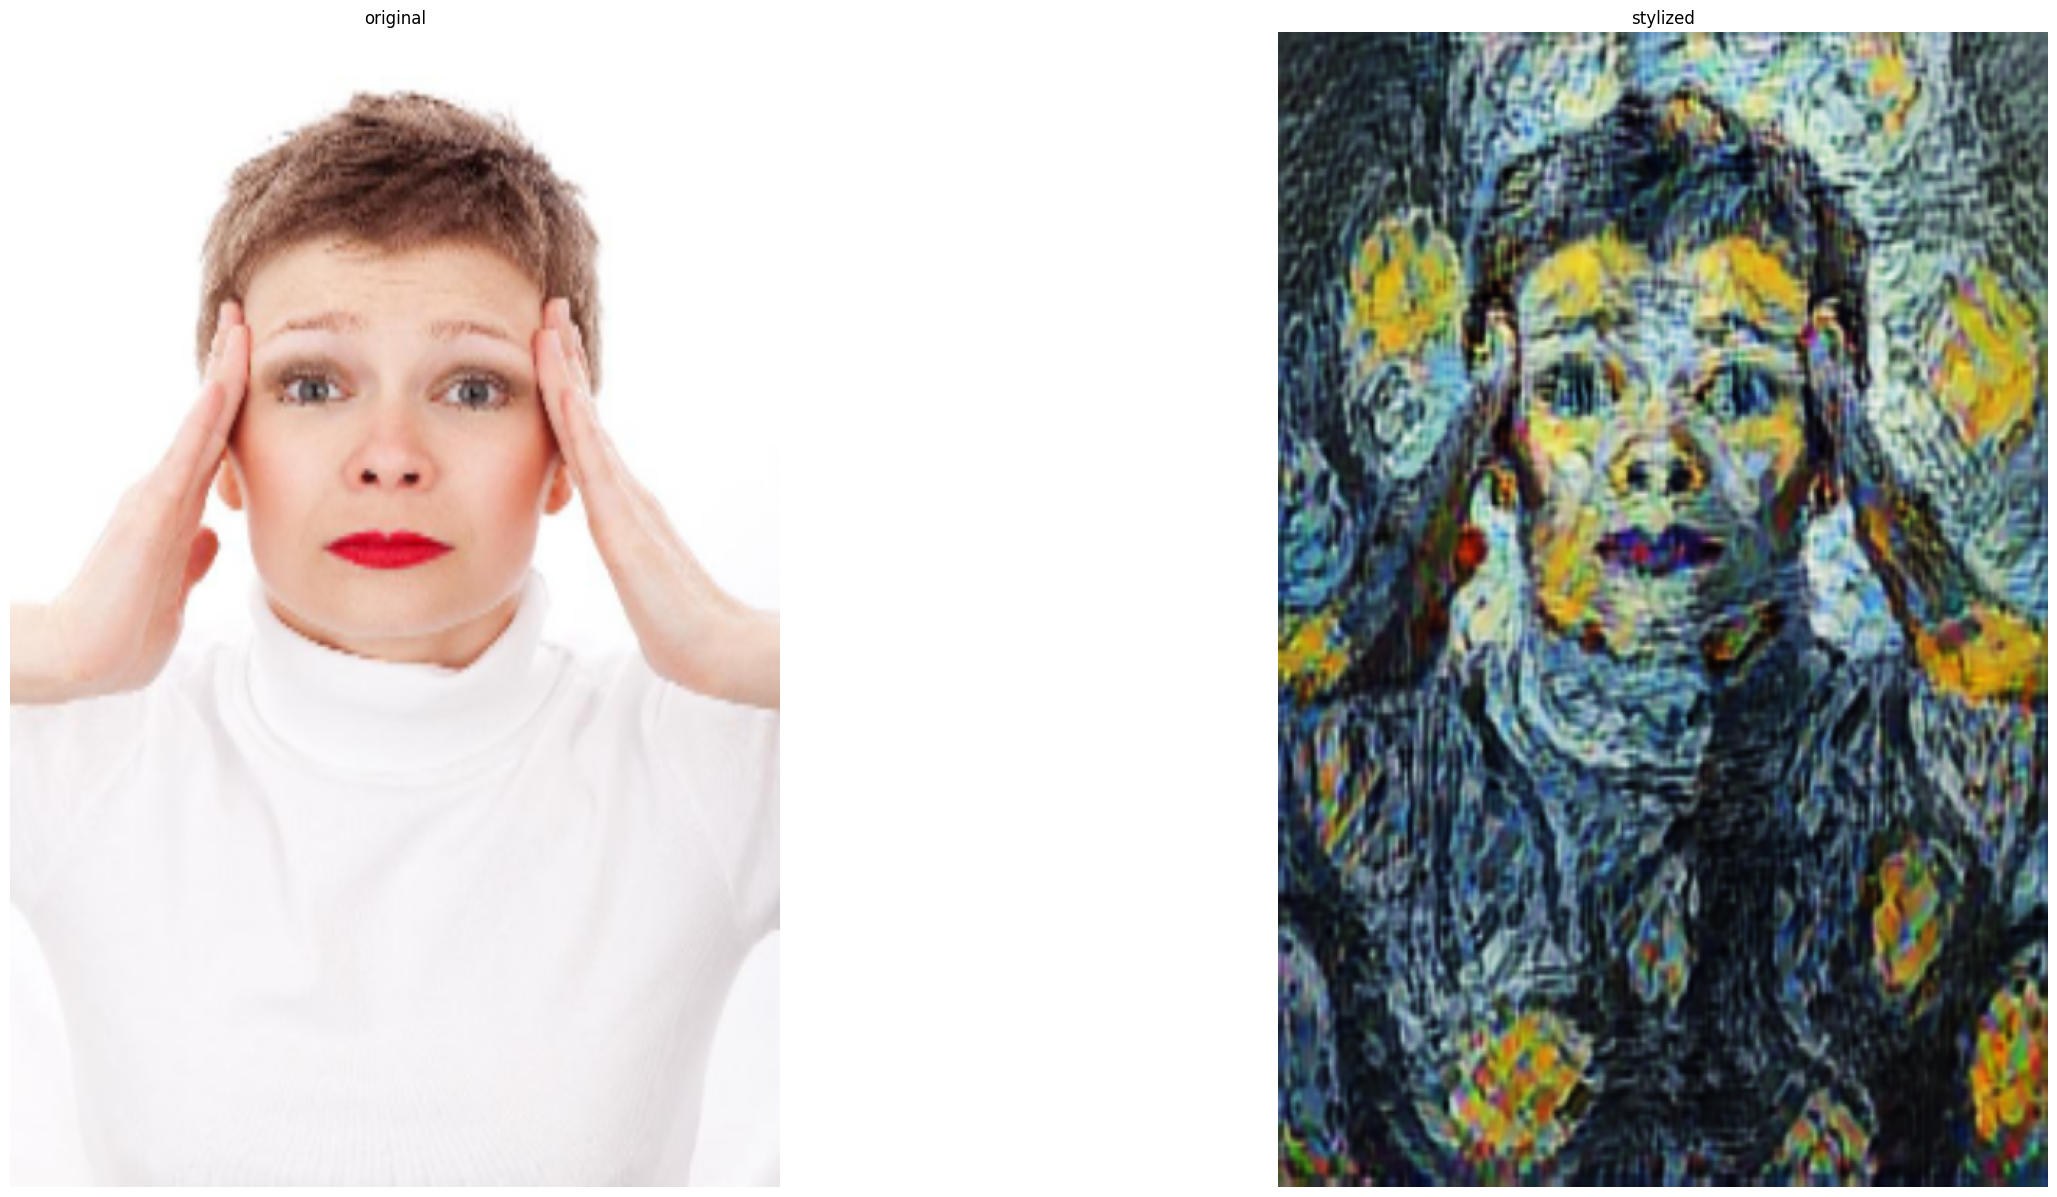

In [78]:
stylized_img, img = stylize_image()
visualize([img, stylized_img], ['original', 'stylized'])

In [85]:
### defining the paths
## path to the original images and original masks
data_path  ='/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person/people_segmentation/'
Images_dir = os.path.join(data_path, 'images')
Masks_dir = os.path.join(data_path, 'masks')
## path to store the shuffled images and shuffled masks
stylized_data_path  ='/home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_stylized'
stylized_Images_dir = os.path.join(stylized_data_path, 'images')
stylized_Masks_dir = os.path.join(stylized_data_path, 'masks')

Images_list = sorted(os.listdir(Images_dir)) ## getting the list of images inside the directory
Masks_list = sorted(os.listdir(Masks_dir))  ## getting the list of masks inside the directory

if not(os.path.exists(stylized_Images_dir)):
    os.mkdir(stylized_Images_dir)
if not(os.path.exists(stylized_Masks_dir)):
    os.mkdir(stylized_Masks_dir)
    
print('-------------------------------------------')
print(f"Stylizing .....")
print(f"The new dataset is being stored in {stylized_Images_dir}")

for (img_name, mask_name, k) in zip(Images_list, Masks_list, tqdm(range(len(Images_list)),desc = 'Progress bar')):
    ##reading the image and the mask
    img_dir = os.path.join(Images_dir, img_name)
    mask_dir = os.path.join(Masks_dir, mask_name)
    mask = cv2.imread(mask_dir)
    ## shuffling the image and the mask
    stylized_img, img = stylize_image(img_path = img_dir)
#     visualize([img, stylized_img], ['original', 'stylized'])
    ###save the shuffeled image and mask to their specific folder
    cv2.imwrite(os.path.join(stylized_Images_dir,img_name),stylized_img)
    cv2.imwrite(os.path.join(stylized_Masks_dir,mask_name),mask)

-------------------------------------------
Stylizing .....
The new dataset is being stored in /home/mohamed.boudjoghra/assignements/AI701/project/datasets/person_stylized/images


Progress bar: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 5677/5678 [29:14<00:00,  3.24it/s]


In [84]:
print(len(Images_list))

5678


In [86]:
stylized_Images_list = sorted(os.listdir(stylized_Images_dir))
len(stylized_Images_list)

5678